In [1]:
import cv2
import numpy as np

In [2]:
day1 = "img/edgar.jpeg"
day_img = cv2.imread(day1)

In [3]:
type(day_img)

numpy.ndarray

### Show the imageee

In [4]:
#cv2.imshow("Day 1", day_img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

### But I want to see the images inside the notwbook!

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

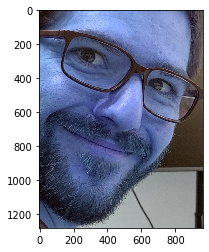

In [6]:
#plt.figure(figsize = (20,15))
plt.imshow(day_img)

### Solve the colors problem

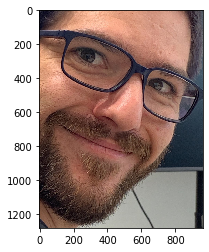

In [7]:
#plt.figure(figsize = (20,15))
plt.imshow(cv2.cvtColor(day_img,cv2.COLOR_BGR2RGB))

### Shape of image

In [8]:
day_img.shape

(1280, 960, 3)

### Grayscale

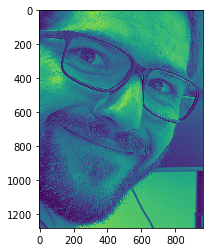

In [9]:
#plt.figure(figsize = (20,15))
plt.imshow(cv2.cvtColor(day_img,cv2.COLOR_RGB2GRAY))

In [10]:
# La primera y la segona linea son iguals
day_img_grayscale = cv2.imread(day1,0)
day_img_grayscale = cv2.imread(day1,cv2.IMREAD_GRAYSCALE)  ## 0 = cv2.COLOR_GRAYSCALE

day_img_grayscale = cv2.cvtColor(day_img,cv2.COLOR_BGR2GRAY) ## Carrega una imatge i la canvia de color





## Whats the shape now?

In [11]:
day_img_grayscale.shape

(1280, 960)

## We need to indicate the colormap

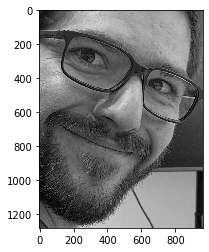

In [12]:
#plt.figure(figsize = (20,15))
plt.imshow(cv2.cvtColor(day_img,cv2.COLOR_RGB2GRAY),cmap="gray")

## Crop the image

In [13]:
edgar_img_cropped = day_img[200:350,200:400]

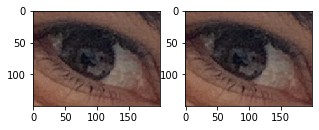

In [14]:
fig, axs = plt.subplots(1,2, figsize=(5,5))

axs[0].imshow(cv2.cvtColor(edgar_img_cropped,cv2.COLOR_BGR2RGB))
axs[1].imshow(cv2.cvtColor(edgar_img_cropped,cv2.COLOR_BGR2RGB))


### Save the image, save the children

In [15]:
cv2.imwrite("output/edgar_cropped.jpg",edgar_img_cropped)

True

### Carreguem nova imatge

In [16]:
new_edgar = cv2.imread("output/edgar_cropped.jpg")

In [17]:
new_edgar.shape
new_edgar = new_edgar[70:80,125:135]

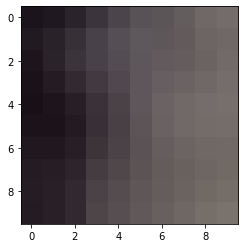

In [18]:
plt.imshow(cv2.cvtColor(new_edgar,cv2.COLOR_BGR2RGB))

In [19]:
cv2.cvtColor(new_edgar,cv2.COLOR_BGR2GRAY) ## La imatge en grayscale, per aixo nomès te una profunditat.

array([[ 23,  27,  38,  55,  71,  84,  87,  95, 106, 110],
       [ 29,  37,  51,  68,  81,  90,  89,  93, 103, 106],
       [ 24,  38,  55,  68,  79,  89,  93,  95, 101, 108],
       [ 21,  31,  45,  61,  75,  89,  97, 101, 106, 111],
       [ 19,  24,  34,  53,  69,  89, 101, 107, 111, 113],
       [ 22,  22,  30,  51,  67,  87, 100, 107, 110, 111],
       [ 27,  27,  34,  55,  69,  85,  96, 102, 106, 107],
       [ 31,  33,  40,  63,  74,  86,  94,  99, 104, 107],
       [ 32,  35,  44,  69,  79,  89,  95, 101, 107, 111],
       [ 31,  35,  44,  72,  81,  91,  98, 105, 112, 116]], dtype=uint8)

### Create a RGB version an store it

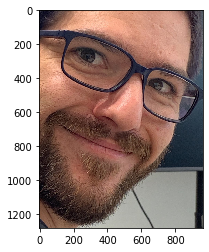

In [20]:
rgb_edgar = cv2.cvtColor(day_img, cv2.COLOR_BGR2RGB)
#plt.figure(figsize = (20,25))
plt.imshow(rgb_edgar)

### Copy image

In [21]:
edgar_copy = rgb_edgar.copy()

## Drawing

### Drawing lines

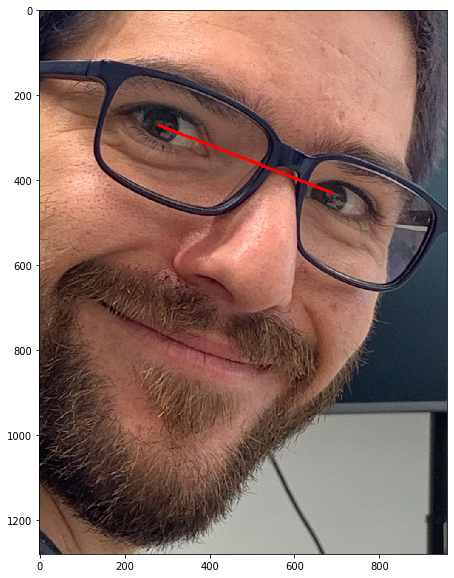

In [22]:
cv2.line(edgar_copy,(280,270),(690,430),(255,0,0),5)
plt.figure(figsize = (15,10))
plt.imshow(edgar_copy)

### Rectangle

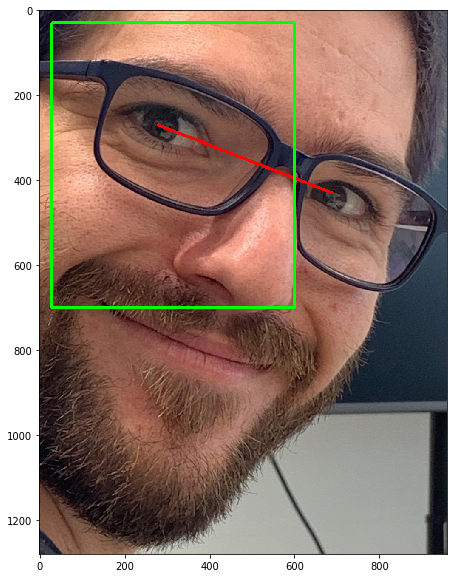

In [23]:
cv2.rectangle(edgar_copy,(600,30),(30,700),(0,255,0),5) ## Si en comptes del 5 poses -1 es fill
plt.figure(figsize = (15,10))
plt.imshow(edgar_copy)

### Circles

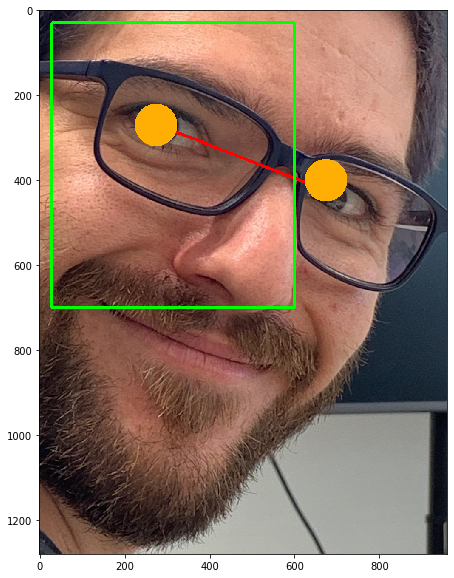

In [24]:
# circle(img,center,radius,color)
cv2.circle(edgar_copy,(275,270),50,(255,175,3),-1)
cv2.circle(edgar_copy,(675,400),50,(255,175,3),-1)
plt.figure(figsize = (15,10))
plt.imshow(edgar_copy)

### Ellipses

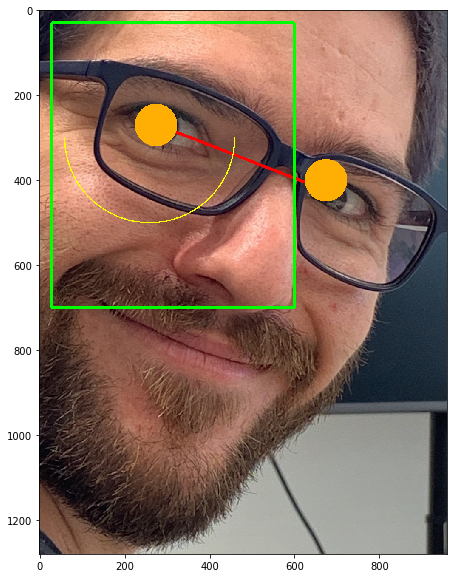

In [25]:
#ellipse(img,center,axes,angle,startAngle,endAngle,Color)

cv2.ellipse(edgar_copy,(260,300),(200,200),0,0,180,(255,255,0),2)
plt.figure(figsize = (15,10))
plt.imshow(edgar_copy)

### Poligons

In [26]:
pts = np.array([[10,5],[120,130],[170,120],[250,210]], np.int32)
print(pts)

[[ 10   5]
 [120 130]
 [170 120]
 [250 210]]


In [27]:
pts = pts.reshape((-1,1,2))
pts = pts+100
pts

array([[[110, 105]],

       [[220, 230]],

       [[270, 220]],

       [[350, 310]]], dtype=int32)

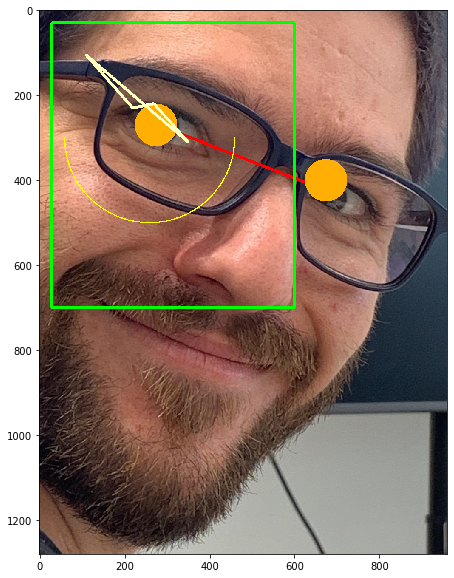

In [28]:
cv2.polylines(edgar_copy,[pts],True,(255,255,190),5)
plt.figure(figsize = (15,10))
plt.imshow(edgar_copy)

### Adding text to image

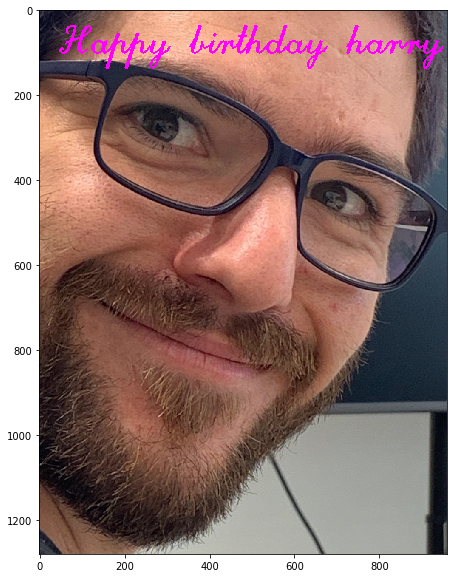

In [29]:
# putText(img, text, org, fontFace, fontScale, color)

edgar_copy = rgb_edgar.copy()

font = cv2.FONT_HERSHEY_SCRIPT_COMPLEX
cv2.putText(edgar_copy,"Happy birthday harry", (50,100),font,3, (255,0,255),4,cv2.LINE_4)
plt.figure(figsize = (15,10))
plt.imshow(edgar_copy)

In [30]:
from PIL import ImageFont, ImageDraw, Image

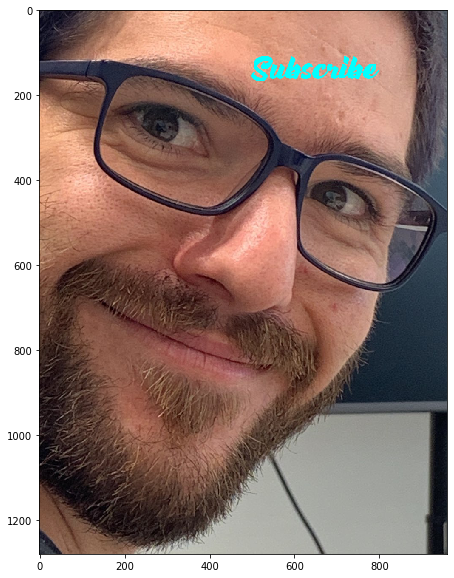

In [31]:
text_to_show = "Subscribe"

#Load image in OpenCV
image = rgb_edgar.copy()

cv2_im_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#Transform the cv2 image to PIL
pil_im = Image.fromarray(cv2_im_rgb)

# Use a true font
font = ImageFont.truetype("font.ttf", 80)
draw = ImageDraw.Draw(pil_im)
draw.text((500,90), text_to_show, (255,255,3),font=font)


#Get back image to OpenVC
cv2_im_processed = cv2.cvtColor(np.array(pil_im),cv2.COLOR_RGB2BGR)

plt.figure(figsize = (15,10))
plt.imshow(cv2_im_processed)


### Alpha

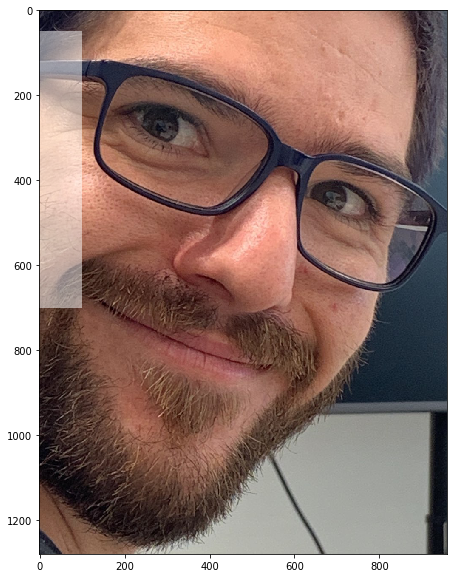

In [32]:
image = rgb_edgar.copy()

# (1) Create a copy of the original
overlay = image.copy()

# (2) 
cv2.rectangle(overlay,(0,50),(100,700),(255,255,255),-1)

# (3) Blend with the original:
opacity = 0.5
cv2.addWeighted(overlay,opacity,image, 1 - opacity,0,image)

plt.figure(figsize = (15,10))
plt.imshow(image)

### Histogram

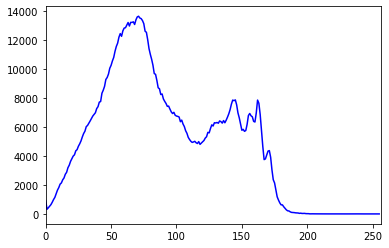

In [33]:
bgr_image = cv2.imread(day1)
histogram = cv2.calcHist([bgr_image],[0],None,[256],[0,256])
plt.plot(histogram,color="b");
plt.xlim(0,256);
plt.show();

0
1
2


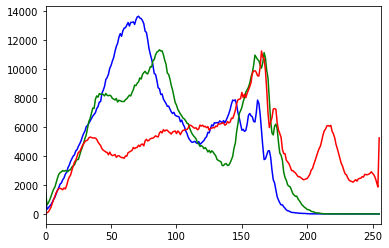

In [34]:
colors = ["b","g","r"]
bgr_image = cv2.imread(day1)
for i,color in enumerate(colors):
    print(i)
    histogram = cv2.calcHist([bgr_image],[i],None,[256],[0,256])
    plt.plot(histogram,color=color);
    plt.xlim(0,256);
plt.show(); 

### BGR Splitting the color channels

(1280, 960)

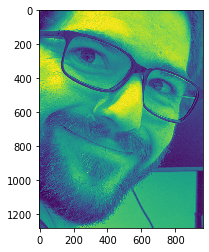

In [71]:
B,R,G = cv2.split(bgr_image)
#plt.figure(figsize = (15,10))
plt.imshow(G)
G.shape

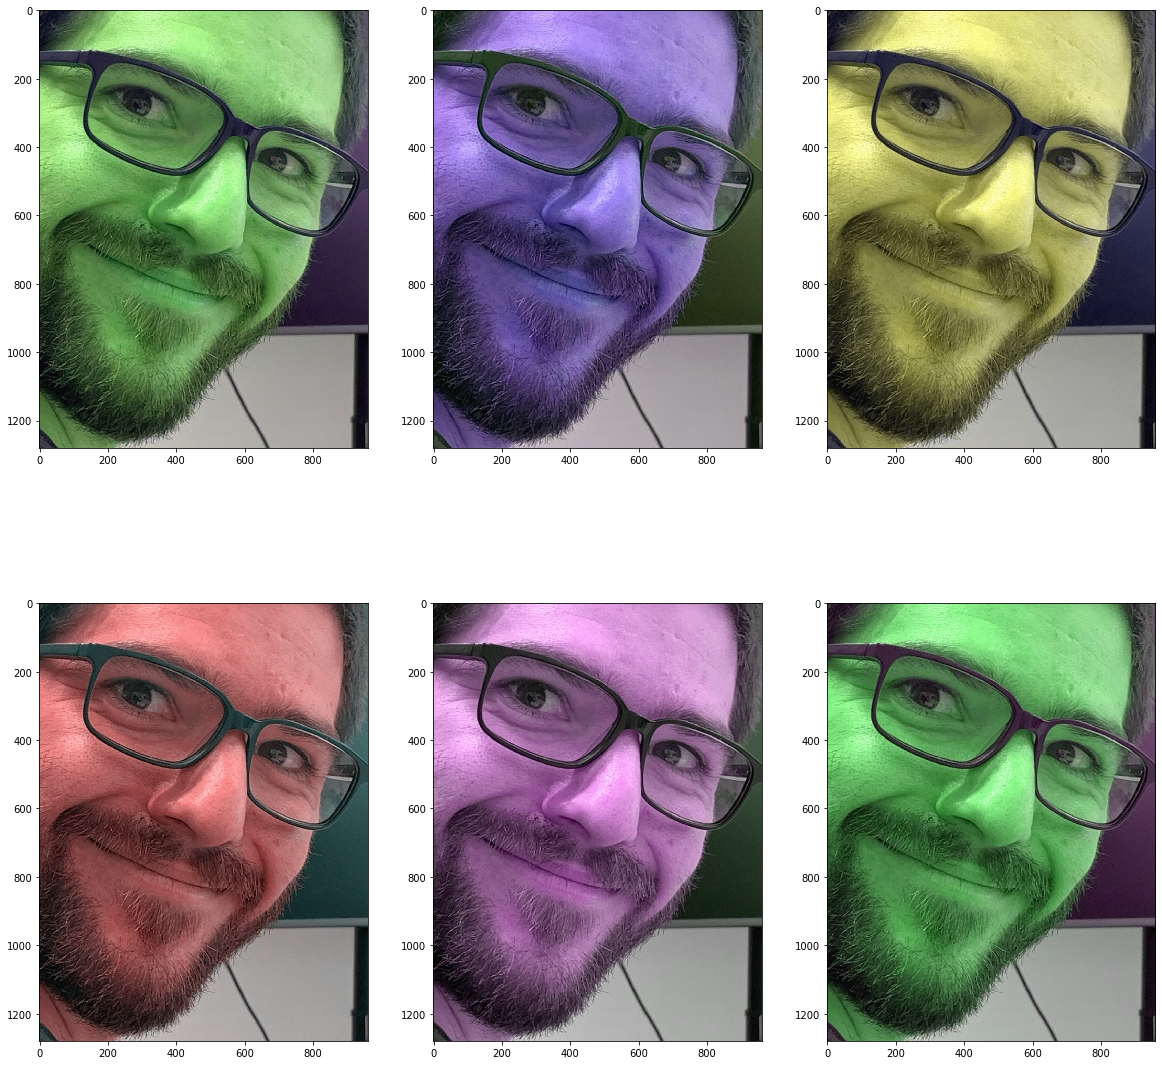

In [79]:
#cv2.imshow("g",G)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
fig, axs = plt.subplots(2,3, figsize=(20,20))
#black = np.zeros(1280, 960, dtype="uint8")

axs[0][0].imshow(cv2.merge([R,G,B]))
axs[0][1].imshow(cv2.merge([R,B,G]))
axs[0][2].imshow(cv2.merge([G,G,B]))

axs[1][0].imshow(cv2.merge([G,B,B]))
axs[1][1].imshow(cv2.merge([G,R,G]))
axs[1][2].imshow(cv2.merge([B,G,B]))



### HSV: Hue Saturation Value

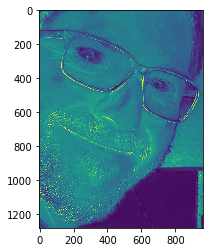

In [94]:
photo = cv2.cvtColor(day_img, cv2.COLOR_BGR2HSV)

hue = photo[:,:,0]
saturation = photo[:,:,1]
value = photo[:,:,2]


#fig, axs = plt.subplots(1,3, figsize=(20,20))
plt.imshow(hue)
plt.imshow(saturation)
#plt.imshow(value)




### Let's do some masks

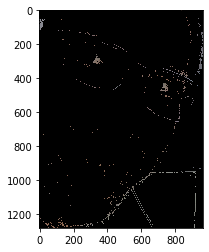

In [103]:
lower_range = (100,100,20)
upper_range=(140,255,255)
hsv_mask = cv2.inRange(image,lower_range,upper_range)

masked_image = np.copy(image)
masked_image[hsv_mask == 0 ] = [0,0,0]

plt.imshow(masked_image)